In [1]:
import numpy as np
import pandas as pd



full_test = pd.read_csv("../data/test.csv", index_col='id')
full_train = pd.read_csv("../data/train.csv", index_col='id')
test_sz = full_test.sat_id.nunique()



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

In [3]:
train_coefs = pd.DataFrame({'sat_id': full_test.sat_id.unique(), 'A': np.zeros(test_sz),
                            'B': np.zeros(test_sz), 'C': np.zeros(test_sz), 'D': np.zeros(test_sz)})

In [4]:
from random import shuffle

In [5]:
np.random.seed(31415)

In [6]:
from sklearn.linear_model import LinearRegression


for sat_id in train_coefs.sat_id:
    # print(sat_id)
    df = full_train[full_train.sat_id == sat_id]
    n = 0; i = 0
    
    a = np.zeros(df.shape[0] // 3); b = np.zeros(df.shape[0] // 3)
    c = np.zeros(df.shape[0] // 3); d = np.zeros(df.shape[0] // 3)

    p1 = df[['x', 'y', 'z']].sample(frac=1).values
    p2 = df[['x', 'y', 'z']].sample(frac=1).values
    p3 = df[['x', 'y', 'z']].sample(frac=1).values
       
    v1 = p3 - p1
    v2 = p2 - p1
 
    # the cross product is a vector normal to the plane
    cp = np.cross(v1, v2)
    sgn_ = 2 * (cp[:, 0] >= 0) - 1
    cp *= sgn_.reshape(-1, 1)
    a, b, c = cp[:, 0], cp[:, 1], cp[:, 2]
   
    norm = np.sqrt(a ** 2 + b ** 2 + c ** 2)
 
    a /= norm
    b /= norm
    c /= norm
    
    d = -(a * p1[:, 0] + b * p1[:, 1] + c * p1[:, 2])
 
    train_coefs.loc[train_coefs.sat_id == sat_id, 'A'] = np.nanmedian(a)
    train_coefs.loc[train_coefs.sat_id == sat_id, 'B'] = np.nanmedian(b)
    train_coefs.loc[train_coefs.sat_id == sat_id, 'C'] = np.nanmedian(c)
    train_coefs.loc[train_coefs.sat_id == sat_id, 'D'] = np.nanmedian(d)

/home/paniquex/anaconda3/envs/kaggle/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/home/paniquex/anaconda3/envs/kaggle/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/home/paniquex/anaconda3/envs/kaggle/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


In [7]:
train_coefs.head()

,sat_id,A,B,C,D
0,1,0.105813,-0.506322,-0.830986,428.095768
1,2,0.272114,0.582492,0.765522,0.417844
2,3,0.043096,0.024531,-0.998760,-11.926576
3,4,0.153223,-0.843987,0.513590,10.014767
4,6,0.274336,0.515361,-0.811837,-5.018759


In [8]:
train_coefs.to_csv("ABCD.csv", index=False)

In [9]:
abs(train_coefs.C).min()

0.007037690900878411

<IPython.core.display.Javascript object>


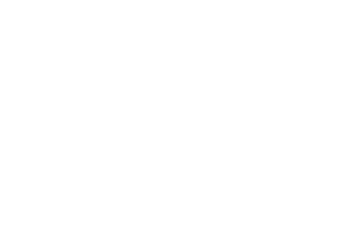

In [10]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(231, projection='3d')
ax.scatter(full_train[full_train.sat_id == 1].x, full_train[full_train.sat_id == 1].y, full_train[full_train.sat_id == 1].z)

ax = fig.add_subplot(232, projection='3d')
ax.scatter(full_train[full_train.sat_id == 2].x, full_train[full_train.sat_id == 2].y, full_train[full_train.sat_id == 2].z)

ax = fig.add_subplot(233, projection='3d')
ax.scatter(full_train[full_train.sat_id == 579].x, full_train[full_train.sat_id == 579].y, full_train[full_train.sat_id == 579].z)

ax = fig.add_subplot(234, projection='3d')
ax.scatter(full_train[full_train.sat_id == 596].x, full_train[full_train.sat_id == 596].y, full_train[full_train.sat_id == 596].z)

ax = fig.add_subplot(235, projection='3d')
ax.scatter(full_train[full_train.sat_id == 6].x, full_train[full_train.sat_id == 6].y, full_train[full_train.sat_id == 6].z)

ax = fig.add_subplot(236, projection='3d')
ax.scatter(full_train[full_train.sat_id == 20].x, full_train[full_train.sat_id == 20].y, full_train[full_train.sat_id == 20].z)


In [11]:
train_coefs = pd.read_csv('ABCD.csv')
train_coefs.head()

,sat_id,A,B,C,D
0,1,0.105813,-0.506322,-0.830986,428.095768
1,2,0.272114,0.582492,0.765522,0.417844
2,3,0.043096,0.024531,-0.998760,-11.926576
3,4,0.153223,-0.843987,0.513590,10.014767
4,6,0.274336,0.515361,-0.811837,-5.018759


In [12]:
A = train_coefs[train_coefs.sat_id == 1]['A'][0]
A

0.1058128009454192

<IPython.core.display.Javascript object>


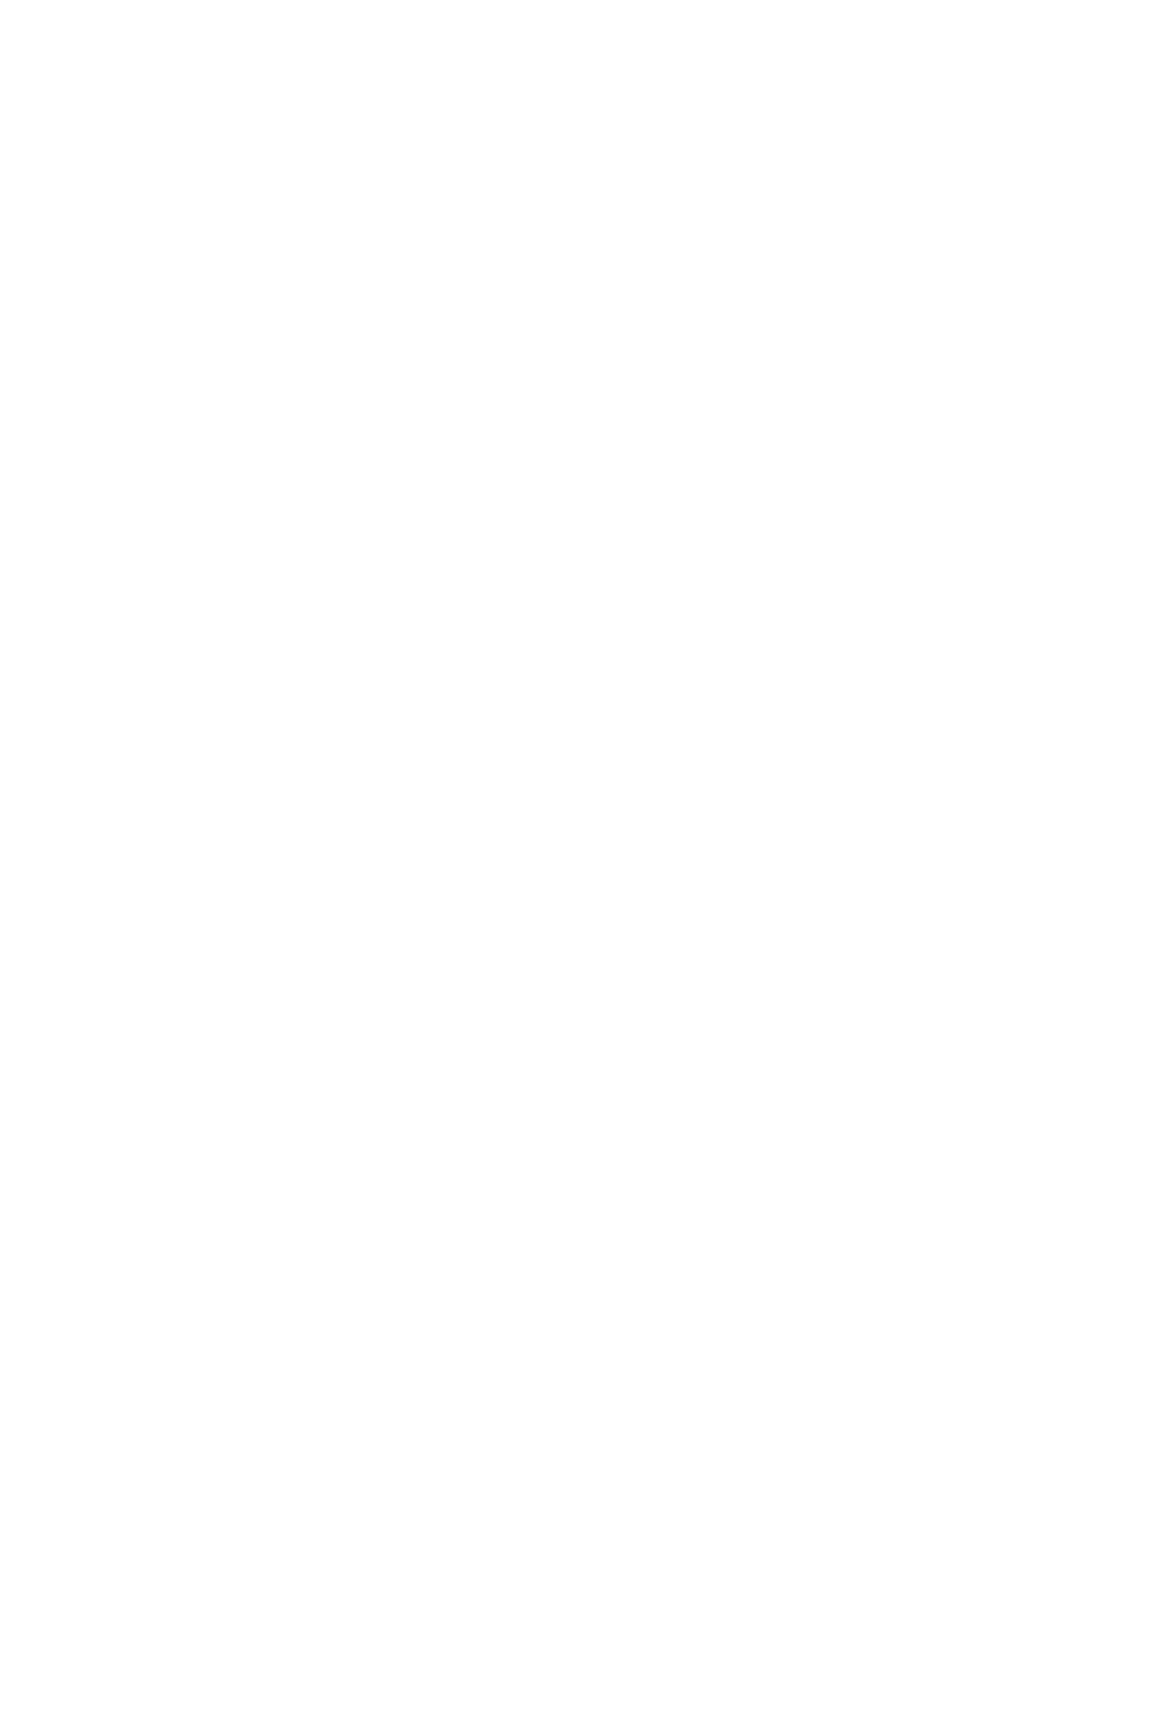

In [13]:
# %matplotlib notebook
fig = plt.figure(figsize=(20, 30))

i = 1
for sat_id in full_test.sat_id.unique()[:]:
    ax = fig.add_subplot(10, 5, i, projection='3d')
    
    xx, yy = np.meshgrid([-60000, 60000], [-60000, 60000], sparse=True)
    A = train_coefs[train_coefs.sat_id == sat_id]['A'].values
    B = train_coefs[train_coefs.sat_id == sat_id]['B'].values
    C = train_coefs[train_coefs.sat_id == sat_id]['C'].values
    D = train_coefs[train_coefs.sat_id == sat_id]['D'].values
    zz = (-A * xx - B * yy + D) / C
    ax.plot_surface(xx, yy, zz, alpha=0.6)
    
    
    ax.scatter(full_train[full_train.sat_id == sat_id].x, full_train[full_train.sat_id == sat_id].y, full_train[full_train.sat_id == sat_id].z)
    i += 1
    if i == 51:
        break

In [14]:
"""def new_coord(df, train_coefs):
    df[['x1', 'y1', 'z1']] = 0
    train_coefs[['x1c, y1c']] = 0
    for sat_id in df.sat_id.values:
        A, B, C, D = train_coefs[train_coefs.sat_id == sat_id].values
        d = sqrt(B ** 2 + C ** 2)
        
        # My(-beta) * Mx(alpha)
        M = [[d/sqrt(A ** 2 + d ** 2) -B * A / d / sqrt(A ** 2 + d ** 2) -C * A / d / sqrt(A ** 2 + d ** 2)],
            [0 C/d -B/d],
            [A / sqrt(A ** 2 + d ** 2) B / sqrt(A ** 2 + d ** 2) C / sqrt(A ** 2 + d ** 2)]]
        
        sz = df[df.sat_id == sat_id].shape[0]  
        df[df.sat_id == sat_id][['x1', 'y1', 'z1']] = (M * (df[df.sat_id == sat_id][['x', 'y', 'z']].values.T - \
                                      np.array([np.zeros(sz), np.zeros(sz), -D/C * np.ones(sz)])).T"""
                                                       
        

"def new_coord(df, train_coefs):\n    df[['x1', 'y1', 'z1']] = 0\n    train_coefs[['x1c, y1c']] = 0\n    for sat_id in df.sat_id.values:\n        A, B, C, D = train_coefs[train_coefs.sat_id == sat_id].values\n        d = sqrt(B ** 2 + C ** 2)\n        \n        # My(-beta) * Mx(alpha)\n        M = [[d/sqrt(A ** 2 + d ** 2) -B * A / d / sqrt(A ** 2 + d ** 2) -C * A / d / sqrt(A ** 2 + d ** 2)],\n            [0 C/d -B/d],\n            [A / sqrt(A ** 2 + d ** 2) B / sqrt(A ** 2 + d ** 2) C / sqrt(A ** 2 + d ** 2)]]\n        \n        sz = df[df.sat_id == sat_id].shape[0]  \n        df[df.sat_id == sat_id][['x1', 'y1', 'z1']] = (M * (df[df.sat_id == sat_id][['x', 'y', 'z']].values.T -                                       np.array([np.zeros(sz), np.zeros(sz), -D/C * np.ones(sz)])).T"

In [15]:
def new_coord(df, train_coefs):
    df['x1'] = 0.0; df['y1'] = 0.0; df['z_pred'] = 0.0
    for sat_id in df.sat_id.unique():
        # print(sat_id)
        A, B, C, D = train_coefs[train_coefs.sat_id == sat_id][['A', 'B', 'C', 'D']].values[0]
        d = np.sqrt(B ** 2 + C ** 2)
        
        # My(-beta) * Mx(alpha) без последней строки
        M = [[d/np.sqrt(A ** 2 + d ** 2), -B*A/d/ np.sqrt(A ** 2 + d ** 2), -C*A/d/ np.sqrt(A ** 2 + d ** 2)],
             [0, C/d, -B/d],
             [A / np.sqrt(A ** 2 + d ** 2), B / np.sqrt(A ** 2 + d ** 2), C / np.sqrt(A ** 2 + d ** 2)]]
        
        sz = df[df.sat_id == sat_id].shape[0]
        
        coord = np.dot(M, (df[df.sat_id == sat_id][['x', 'y', 'z']].values.T \
                    - np.array([np.zeros(sz), np.zeros(sz), -D/C * np.ones(sz)]))).T
        df.loc[df.sat_id == sat_id, 'x1'] = coord[:, 0]
        df.loc[df.sat_id == sat_id, 'y1'] = coord[:, 1]
        df.loc[df.sat_id == sat_id, 'z_pred'] = coord[:, 2]
    return df

In [16]:
part_train = full_train.loc[full_train['sat_id'].isin(full_test.sat_id.unique())]
part_train_new = new_coord(part_train.copy(), train_coefs)
part_train_new.head()

,epoch,sat_id,x,y,z,Vx,Vy,Vz,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim,x1,y1,z_pred
id,,,,,,,,,,,,,,,,,
1819,2014-01-01T00:00:00.000,1,10390.313089,-2796.458271,3179.562085,2.520477,6.149930,-2.827599,10405.813755,-2771.180760,3166.926302,2.508879,6.152996,-2.826227,10418.093713,3774.438762,307.777715
1820,2014-01-01T00:21:11.845,1,11195.606833,5078.653968,-839.076593,-1.126667,5.826412,-3.255872,11199.853336,5102.405255,-845.930363,-1.130992,5.822303,-3.250049,11290.645646,-5041.655735,-267.094930
1821,2014-01-01T00:42:23.690,1,8235.556436,11445.904263,-4680.514023,-3.230227,4.126433,-2.704441,8239.504004,11465.137350,-4680.291877,-3.227356,4.123931,-2.700255,8351.463045,-12477.881711,-619.465579
1822,2014-01-01T01:03:35.534,1,3560.149776,15634.195146,-7654.177182,-3.964696,2.520867,-1.978151,3569.107805,15652.050271,-7650.341207,-3.960215,2.520907,-1.976723,3664.523173,-17601.820760,-766.855510
1823,2014-01-01T01:24:47.379,1,-1580.476891,18023.318335,-9755.287599,-4.050865,1.296388,-1.346512,-1566.253652,18042.143340,-9750.982621,-4.047005,1.297625,-1.347010,-1505.560037,-20735.316603,-774.636361


<IPython.core.display.Javascript object>


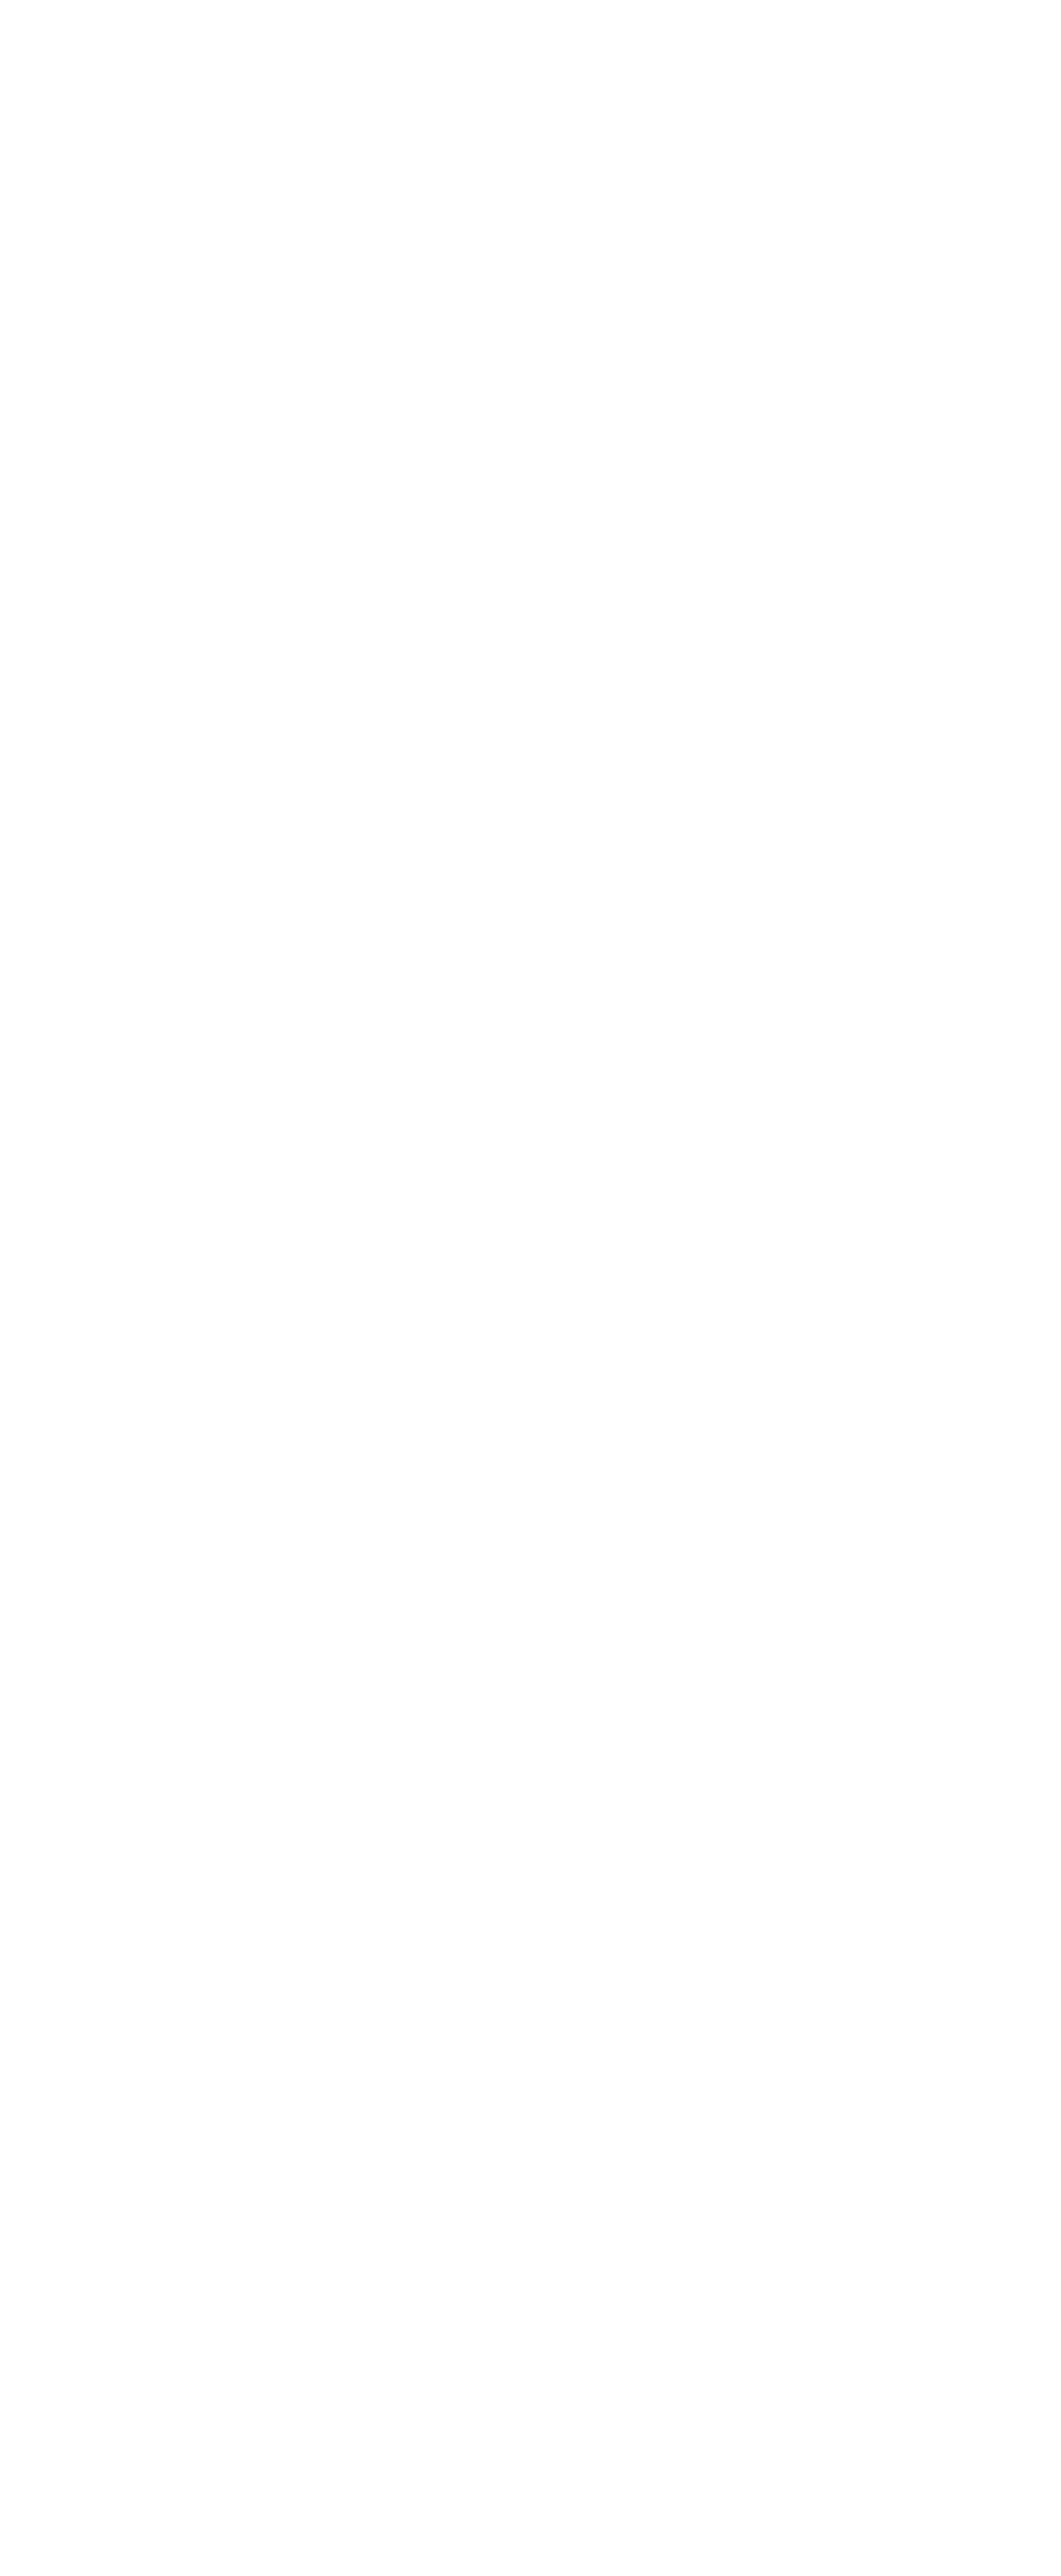

In [17]:
fig = plt.figure(figsize=(70, 170))

i = 1
for sat_id in part_train_new.sat_id.unique()[:]:
    ax = fig.add_subplot(50, 6, i)
    ax.scatter(part_train_new[part_train_new.sat_id == sat_id].x1, part_train_new[part_train_new.sat_id == sat_id].y1)
    i += 1

In [18]:
def shift_to_center_and_rotate(df, train_coefs):
    train_coefs['xc'] = 0.0; train_coefs['yc'] = 0.0
    #shift
    for sat_id in df.sat_id.unique():
        train_coefs.loc[train_coefs.sat_id == sat_id, 'xc'] = (df[df.sat_id == sat_id].x1.max() + df[df.sat_id == sat_id].x1.min()) / 2
        train_coefs.loc[train_coefs.sat_id == sat_id, 'yc'] = (df[df.sat_id == sat_id].y1.max() + df[df.sat_id == sat_id].y1.min()) / 2
    
        df.loc[df.sat_id == sat_id, 'x1'] = df[df.sat_id == sat_id].x1.values - train_coefs[train_coefs.sat_id == sat_id].xc.values
        df.loc[df.sat_id == sat_id, 'y1'] = df[df.sat_id == sat_id].y1.values - train_coefs[train_coefs.sat_id == sat_id].yc.values
    
    train_coefs['small_polyos'] = 0.0; train_coefs['big_polyos'] = 0.0
    #rotate
    train_coefs['vect_max_x'] = 0.0; train_coefs['vect_max_y'] = 0.0
    train_coefs['vect_min_x'] = 0.0; train_coefs['vect_min_y'] = 0.0
    for sat_id in df.sat_id.unique():
        #print(sat_id)
        distances = np.sqrt((df[df.sat_id == sat_id].x1.values) ** 2 + (df[df.sat_id == sat_id].y1.values) ** 2)
        id_min = np.argmin(distances); id_max = np.argmax(distances)
        train_coefs.loc[train_coefs.sat_id == sat_id, 'small_polyos'] = distances[id_min]
        train_coefs.loc[train_coefs.sat_id == sat_id, 'big_polyos'] = distances[id_max]
 
        a = df.loc[df[df.sat_id == sat_id].index[0] + id_max][['x1', 'y1']].values #vector where big polyos
        train_coefs.loc[train_coefs.sat_id == sat_id, 'vect_max_x'] = a[0]
        train_coefs.loc[train_coefs.sat_id == sat_id, 'vect_max_y'] = a[1]
        
#         a1 = df.loc[df[df.sat_id == sat_id].index[0] + id_min][['x1', 'y1']].values #vector where small polyos
#         train_coefs.loc[train_coefs.sat_id == sat_id, 'vect_min_x'] = a1[0]
#         train_coefs.loc[train_coefs.sat_id == sat_id, 'vect_min_y'] = a1[1]
        
        cos_teta =  a[0] / np.sqrt(a[0] ** 2 + a[1] ** 2)
        sin_teta = a[1] / np.sqrt(a[0] ** 2 + a[1] ** 2)
        train_coefs.loc[train_coefs.sat_id == sat_id, 'cos_teta'] = cos_teta
        train_coefs.loc[train_coefs.sat_id == sat_id, 'sin_teta'] = sin_teta
        M = [[cos_teta, sin_teta],
            [-sin_teta, cos_teta]]
        coord = (np.dot(M, df[df.sat_id == sat_id][['x1', 'y1']].values.T)).T
        df.loc[df.sat_id == sat_id, 'x1'] = coord[:, 0]
        df.loc[df.sat_id == sat_id, 'y1'] = coord[:, 1]
        
        coord = (np.dot(M, train_coefs[train_coefs.sat_id == sat_id][['vect_max_x', 'vect_max_y']].values.T)).T
        train_coefs.loc[train_coefs.sat_id == sat_id, 'vect_max_x'] = coord[:, 0]
        train_coefs.loc[train_coefs.sat_id == sat_id, 'vect_max_y'] = coord[:, 1]
        
#         coord = (np.dot(M, train_coefs[train_coefs.sat_id == sat_id][['vect_min_x', 'vect_min_y']].values.T)).T
#         train_coefs.loc[train_coefs.sat_id == sat_id, 'vect_min_x'] = coord[:, 0]
#         train_coefs.loc[train_coefs.sat_id == sat_id, 'vect_min_y'] = coord[:, 1]
    return df, train_coefs

In [19]:
part_train_new2, train_coefs_new = shift_to_center_and_rotate(part_train_new.copy(), train_coefs.copy())
part_train_new2.head()

,epoch,sat_id,x,y,z,Vx,Vy,Vz,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim,x1,y1,z_pred
id,,,,,,,,,,,,,,,,,
1819,2014-01-01T00:00:00.000,1,10390.313089,-2796.458271,3179.562085,2.520477,6.149930,-2.827599,10405.813755,-2771.180760,3166.926302,2.508879,6.152996,-2.826227,22464.809264,-5.423660e-13,307.777715
1820,2014-01-01T00:21:11.845,1,11195.606833,5078.653968,-839.076593,-1.126667,5.826412,-3.255872,11199.853336,5102.405255,-845.930363,-1.130992,5.822303,-3.250049,20522.826356,-8.643701e+03,-267.094930
1821,2014-01-01T00:42:23.690,1,8235.556436,11445.904263,-4680.514023,-3.230227,4.126433,-2.704441,8239.504004,11465.137350,-4680.291877,-3.227356,4.123931,-2.700255,15395.797474,-1.477965e+04,-619.465579
1822,2014-01-01T01:03:35.534,1,3560.149776,15634.195146,-7654.177182,-3.964696,2.520867,-1.978151,3569.107805,15652.050271,-7650.341207,-3.960215,2.520907,-1.976723,9336.148370,-1.817123e+04,-766.855510
1823,2014-01-01T01:24:47.379,1,-1580.476891,18023.318335,-9755.287599,-4.050865,1.296388,-1.346512,-1566.253652,18042.143340,-9750.982621,-4.047005,1.297625,-1.347010,3443.298838,-1.952137e+04,-774.636361


In [20]:
train_coefs_new.head()

,sat_id,A,B,C,D,xc,yc,small_polyos,big_polyos,vect_max_x,vect_max_y,vect_min_x,vect_min_y,cos_teta,sin_teta
0,1,0.105813,-0.506322,-0.830986,428.095768,-10908.757244,-3284.816408,14922.589858,22464.809264,22464.809264,-9.094947e-13,0.0,0.0,0.949345,0.314236
1,2,0.272114,0.582492,0.765522,0.417844,-25476.842324,7663.915917,56337.730054,62644.100940,62644.100940,0.000000e+00,0.0,0.0,0.956343,-0.292246
2,3,0.043096,0.024531,-0.998760,-11.926576,37123.834047,23930.676956,53710.956406,70237.976563,70237.976563,3.637979e-12,0.0,0.0,-0.837368,-0.546639
3,4,0.153223,-0.843987,0.513590,10.014767,-4360.622629,-9257.666886,28799.283760,30617.204910,30617.204910,0.000000e+00,0.0,0.0,-0.410021,-0.912076
4,6,0.274336,0.515361,-0.811837,-5.018759,-1880.164977,19403.562107,46529.262061,71514.487824,71514.487824,0.000000e+00,0.0,0.0,-0.665411,0.746477


<IPython.core.display.Javascript object>


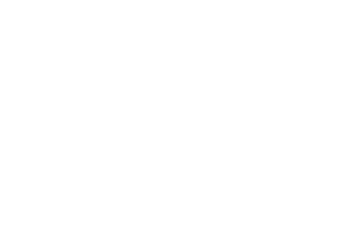

In [21]:
    fig = plt.figure()
    sat_id = 57
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(part_train_new2[part_train_new2.sat_id == sat_id].x1, part_train_new2[part_train_new2.sat_id == sat_id].y1)
    ax.scatter(train_coefs_new[train_coefs_new.sat_id == sat_id].vect_max_x, train_coefs_new[train_coefs_new.sat_id == sat_id].vect_max_y)
    ax.scatter(train_coefs_new[train_coefs_new.sat_id == sat_id].vect_min_x, train_coefs_new[train_coefs_new.sat_id == sat_id].vect_min_y, c='red')

In [22]:
train_coefs_new[train_coefs_new.sat_id == 57]

,sat_id,A,B,C,D,xc,yc,small_polyos,big_polyos,vect_max_x,vect_max_y,vect_min_x,vect_min_y,cos_teta,sin_teta
32,57,0.218106,-0.407193,0.886862,-2.592735,97.574777,333.570707,29974.180786,30113.582344,30113.582344,0.0,0.0,0.0,0.793915,0.608029


<IPython.core.display.Javascript object>


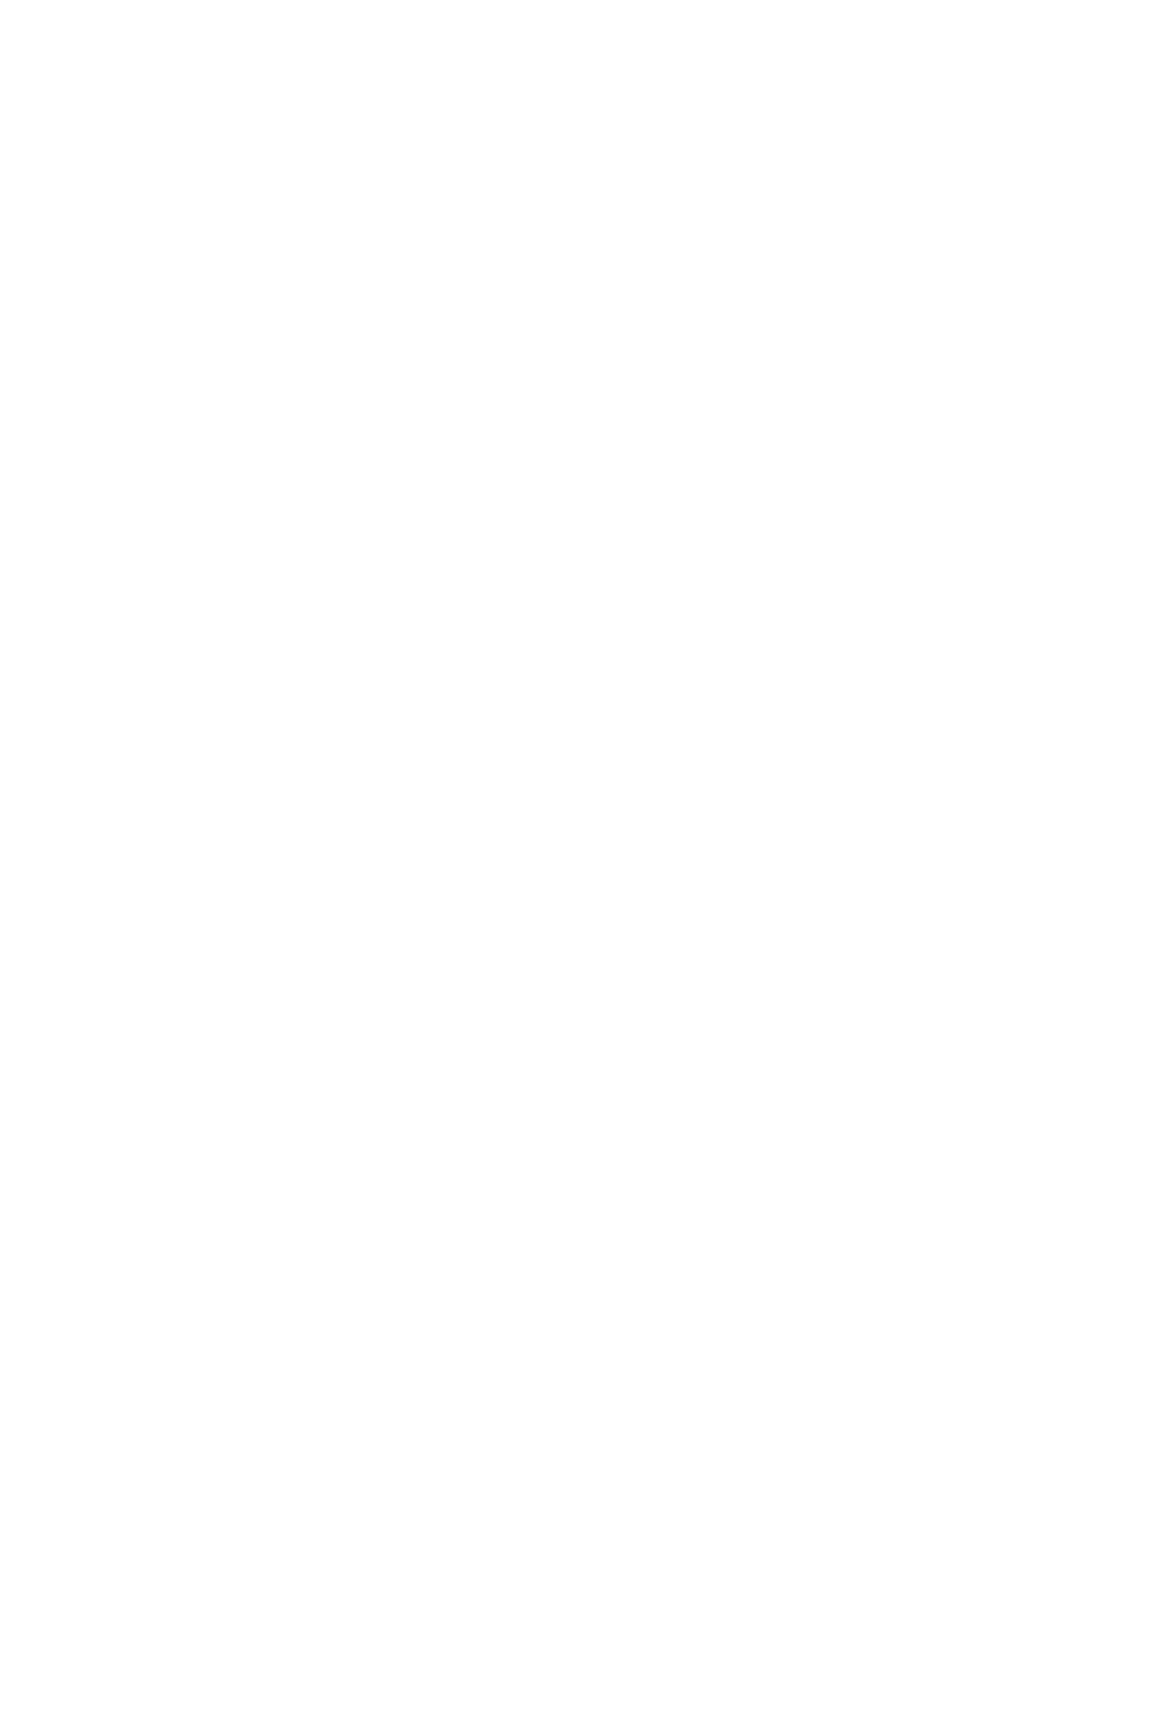

In [23]:
fig = plt.figure(figsize=(20, 30))

i = 1
for sat_id in part_train_new2.sat_id.unique()[:]:
    ax = fig.add_subplot(11, 5, i)
    ax.scatter(part_train_new2[part_train_new2.sat_id == sat_id].x1, part_train_new2[part_train_new2.sat_id == sat_id].y1)
    ax.scatter(train_coefs_new[train_coefs_new.sat_id == sat_id].vect_max_x, train_coefs_new[train_coefs_new.sat_id == sat_id].vect_max_y)
    ax.scatter(train_coefs_new[train_coefs_new.sat_id == sat_id].vect_min_x, train_coefs_new[train_coefs_new.sat_id == sat_id].vect_min_y, c='red')
    i += 1
    if i == 56:
        break

In [24]:
train_coefs_new.head()

,sat_id,A,B,C,D,xc,yc,small_polyos,big_polyos,vect_max_x,vect_max_y,vect_min_x,vect_min_y,cos_teta,sin_teta
0,1,0.105813,-0.506322,-0.830986,428.095768,-10908.757244,-3284.816408,14922.589858,22464.809264,22464.809264,-9.094947e-13,0.0,0.0,0.949345,0.314236
1,2,0.272114,0.582492,0.765522,0.417844,-25476.842324,7663.915917,56337.730054,62644.100940,62644.100940,0.000000e+00,0.0,0.0,0.956343,-0.292246
2,3,0.043096,0.024531,-0.998760,-11.926576,37123.834047,23930.676956,53710.956406,70237.976563,70237.976563,3.637979e-12,0.0,0.0,-0.837368,-0.546639
3,4,0.153223,-0.843987,0.513590,10.014767,-4360.622629,-9257.666886,28799.283760,30617.204910,30617.204910,0.000000e+00,0.0,0.0,-0.410021,-0.912076
4,6,0.274336,0.515361,-0.811837,-5.018759,-1880.164977,19403.562107,46529.262061,71514.487824,71514.487824,0.000000e+00,0.0,0.0,-0.665411,0.746477


## Пример использования кластеризации

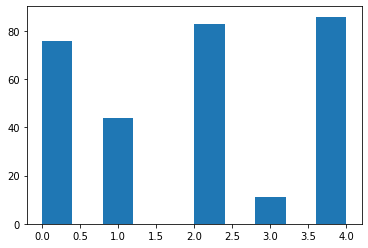

In [29]:
%matplotlib inline
from clustering import Clustering2D

clustering1 = Clustering2D('KMeans')
clusters_map = clustering1.fit_predict(train_coefs_new)

plt.hist(list(clusters_map.values()))
plt.show()

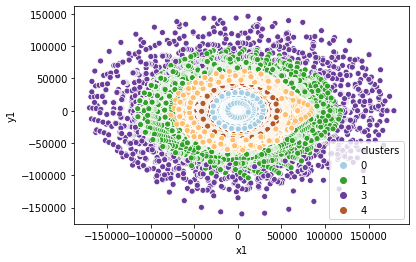

In [30]:
part_train_new2['clusters'] = part_train_new2['sat_id'].map(clusters_map)
sns.scatterplot(data=part_train_new2[['x1', 'y1', 'clusters']][:100000000], hue='clusters', x='x1', y='y1',
                palette="Paired")
plt.show()

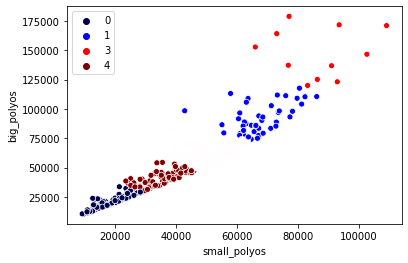

In [31]:
sns.scatterplot(data=train_coefs_new[['small_polyos', 'big_polyos']],
                hue=list(clusters_map.values()), x='small_polyos', y='big_polyos',
                palette='seismic')
plt.show()